### Goal: to retrieve professionally collected weather data from an online source to predict coffee harvests in Minas Gerais, Brazil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
#Monthly Medians
monthly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/MonthlyMedians.csv")
#Yearly Medians
yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/YearlyMedians.csv")
#Yearly Harvest Data fro ALL regions in Brazil
harvest_yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/br_final.csv").dropna()
#Harvest Data for Minas Gerais combined with collected weather data
minas_harvest = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/harvest_weather.csv").dropna()
#Harvest Data for Minas Gerais combined with collected weather data + extra years
extra_harvest_yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/extra_harvest_weather.csv").dropna()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/extra_harvest_weather.csv'

### How have harvest outcomes changed for Minas Gerais throughout the years?

<Axes: xlabel='year', ylabel='million_60kgs_bag'>

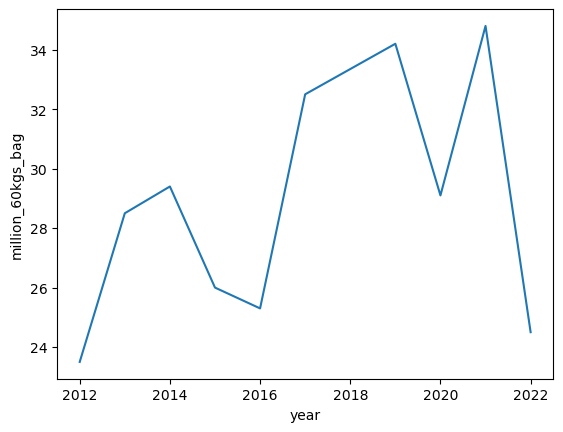

In [50]:
sns.lineplot(data=minas_harvest, x=minas_harvest["year"], y=minas_harvest["million_60kgs_bag"])

Harvests for Minas Gerais have fluctuated greatly over the years. 

##### Are these harvest outcomes similar to other regions in Brazil?

In [82]:
harvest_yearly_index = harvest_yearly.set_index(harvest_yearly["year"])
parana = harvest_yearly[harvest_yearly["subdivision"] == "Parana"]
minas = harvest_yearly[harvest_yearly["subdivision"] == "Minas Gerais"]
espirit = harvest_yearly[harvest_yearly["subdivision"] == "Espirito Santo"]
paulo = harvest_yearly[harvest_yearly["subdivision"] == "Sao Paulo"]

<Axes: xlabel='subdivision'>

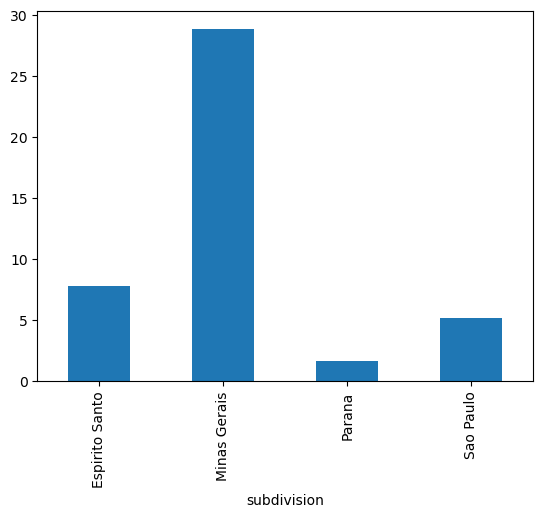

In [75]:
h1 = harvest_yearly.groupby("subdivision")["million_60kgs_bag"].mean()
h1.plot.bar()


<Axes: xlabel='year', ylabel='million_60kgs_bag'>

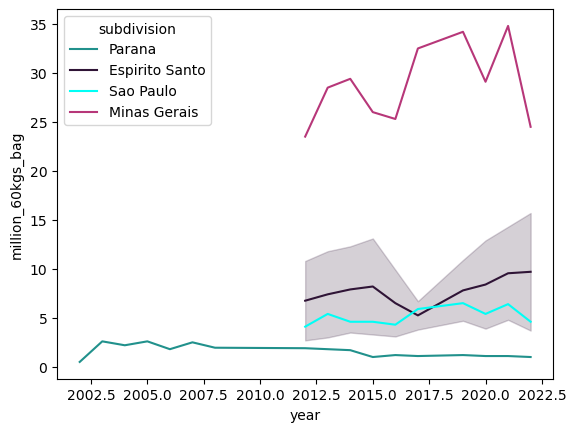

In [73]:
sns.lineplot(data=parana, x=parana["year"], y=parana["million_60kgs_bag"], hue=parana["subdivision"], palette="viridis")
sns.lineplot(data=espirit, x=espirit["year"], y=espirit["million_60kgs_bag"], hue=espirit["subdivision"], palette="twilight")
sns.lineplot(data=paulo, x=paulo["year"], y=paulo["million_60kgs_bag"], hue=paulo["subdivision"],palette="hsv")
sns.lineplot(data=minas, x=minas["year"], y=minas["million_60kgs_bag"], hue=minas["subdivision"],palette="magma")

Harvests for Minas Gerais have been much higher than other coffee producing regions of Brazil. Both graphs show the same trend.

However, other regions of Brazil are experiancing much lower variation per crop.

### How has unemployment changed in the various coffee-producing regions of Brazil? 

<Axes: xlabel='year', ylabel='avg_unemp_perc'>

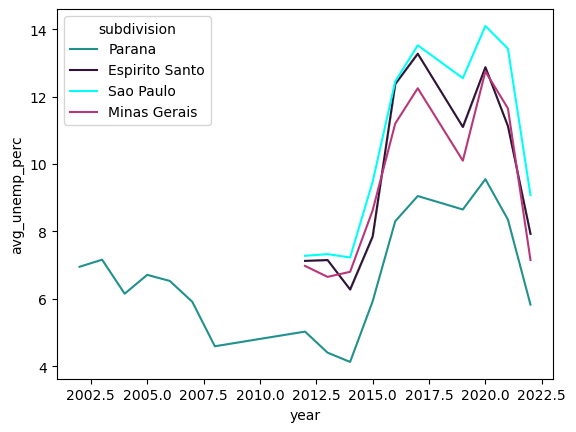

In [76]:
sns.lineplot(data=parana, x=parana["year"], y=parana["avg_unemp_perc"], hue=parana["subdivision"], palette="viridis")
sns.lineplot(data=espirit, x=espirit["year"], y=espirit["avg_unemp_perc"], hue=espirit["subdivision"], palette="twilight")
sns.lineplot(data=paulo, x=paulo["year"], y=paulo["avg_unemp_perc"], hue=paulo["subdivision"],palette="hsv")
sns.lineplot(data=minas, x=minas["year"], y=minas["avg_unemp_perc"], hue=minas["subdivision"],palette="magma")

<Axes: xlabel='subdivision'>

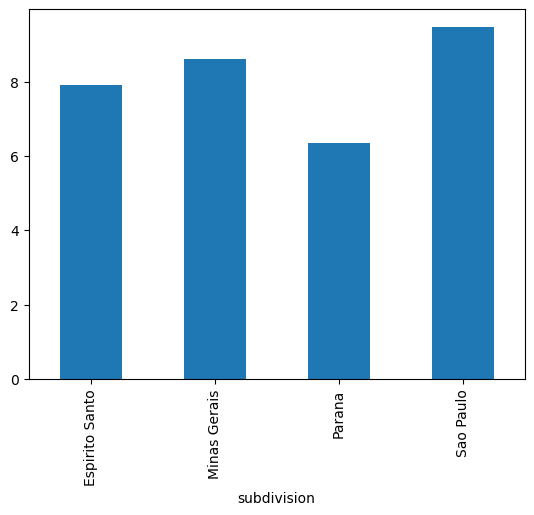

In [84]:
h1 = harvest_yearly.groupby("subdivision")["avg_unemp_perc"].median()
h1.plot.bar()

Unemployment percentages have followed nearly identical patterns over the years, regardless of where the harvest takes place.

<Axes: xlabel='year', ylabel='avg_unemp_perc'>

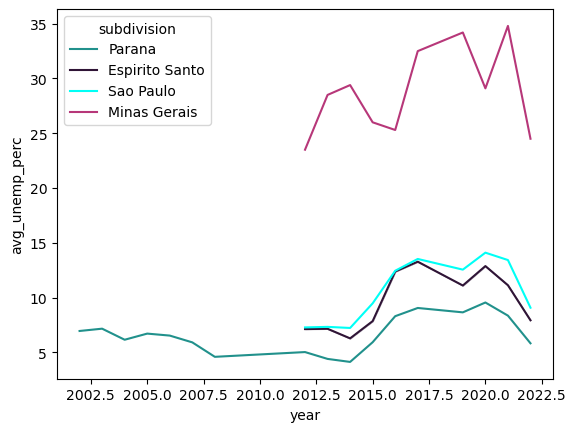

In [79]:
sns.lineplot(data=parana, x=parana["year"], y=parana["avg_unemp_perc"], hue=parana["subdivision"], palette="viridis")
sns.lineplot(data=espirit, x=espirit["year"], y=espirit["avg_unemp_perc"], hue=espirit["subdivision"], palette="twilight")
sns.lineplot(data=paulo, x=paulo["year"], y=paulo["avg_unemp_perc"], hue=paulo["subdivision"],palette="hsv")
sns.lineplot(data=minas, x=minas["year"], y=minas["million_60kgs_bag"], hue=minas["subdivision"],palette="magma")

### How have weather outcomes changed for Minas Gerais throughout the years? 

<Axes: ylabel='temperature'>

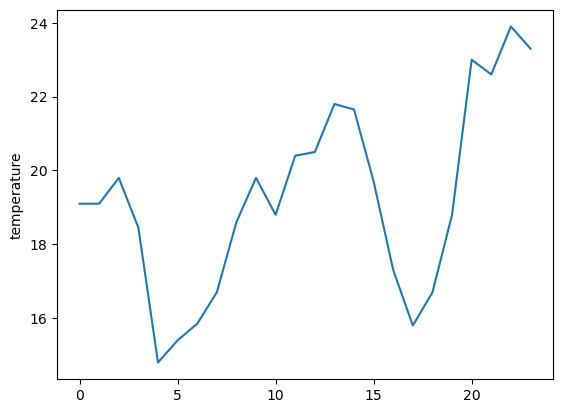

In [81]:
sns.lineplot(monthly["temperature"])

Chart shows two sharp drops around 4 and 17. 
Year 2 had a higher average temperature than Year 1

<Axes: ylabel='temperature'>

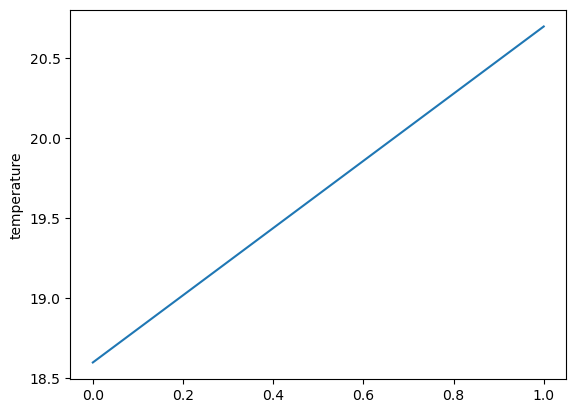

In [34]:
sns.lineplot(yearly["temperature"])

While not very informative, this does confirm year 2 was hotter that year 1.

<Axes: ylabel='precipitation'>

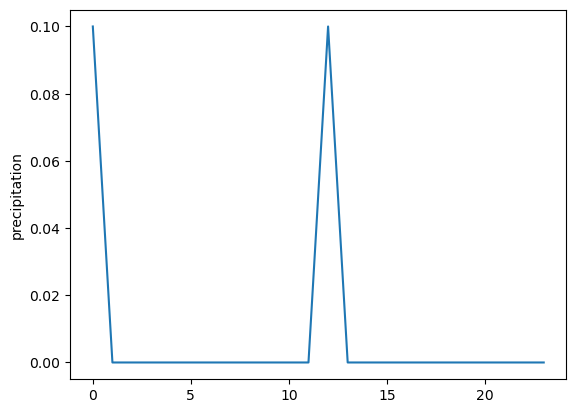

In [30]:
sns.lineplot(monthly["precipitation"])

Precipitation also seems to spike around 12 month cycles.

<Axes: ylabel='humidity'>

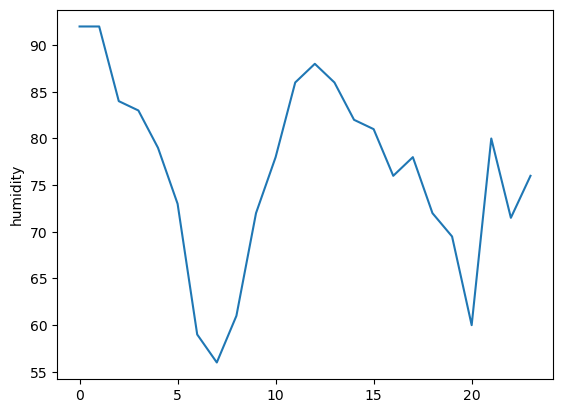

In [29]:
sns.lineplot(monthly["humidity"])

Possible correlation between rainfall and precipitation. Humidity shaply peaks in the same period precipitation occurs. Slowly drops for months after.
Possible correlation with tempurature as well.


<Axes: ylabel='pressure'>

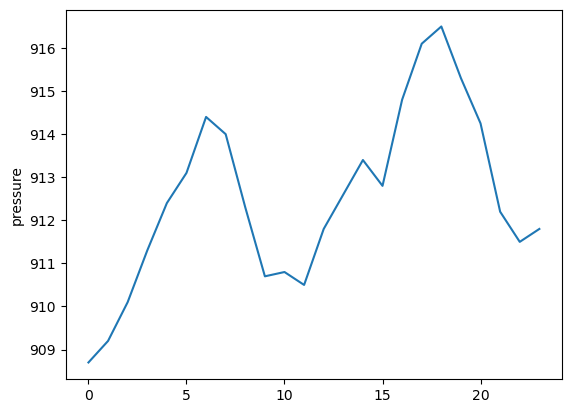

In [32]:
sns.lineplot(monthly["pressure"])

Pressure has a strong inverse correlation with Humidity. However it looks like pressure moves about a month or two sooner than humidity. Let's look more into that

<Axes: xlabel='humidity', ylabel='pressure'>

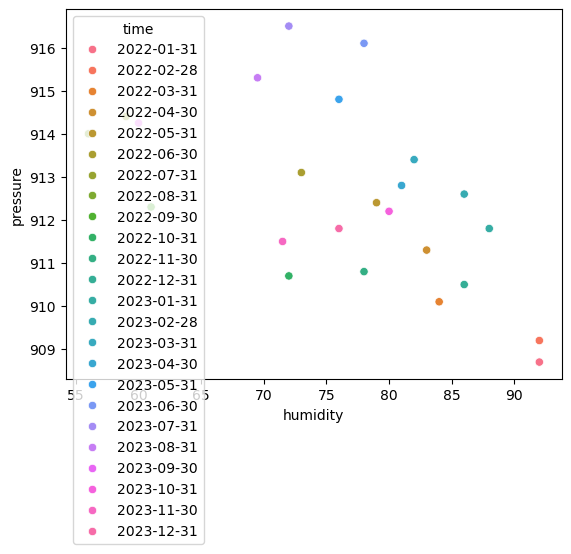

In [11]:
sns.scatterplot(data=monthly, x=monthly["humidity"], y=monthly["pressure"], hue=monthly["time"])


<Axes: xlabel='year', ylabel='avg_unemp_perc'>

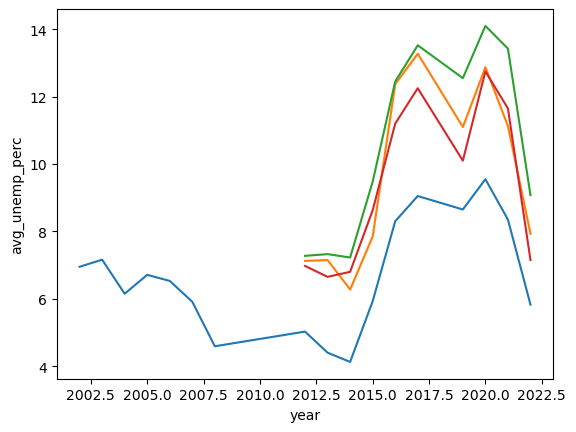

In [76]:
parana = minas_yearly[minas_yearly["subdivision"] == "Parana"]
parana_unemp = parana["avg_unemp_perc"]
minas = minas_yearly[minas_yearly["subdivision"] == "Minas Gerais"]
minas_unemp = minas["avg_unemp_perc"]
espirit = minas_yearly[minas_yearly["subdivision"] == "Espirito Santo"]
espirit_unemp = espirit["avg_unemp_perc"]
paulo = minas_yearly[minas_yearly["subdivision"] == "Sao Paulo"]
paulo_unemp = paulo["avg_unemp_perc"]
sns.lineplot(parana_unemp)
sns.lineplot(espirit_unemp)
sns.lineplot(paulo_unemp)
sns.lineplot(minas_unemp)

Unemployment percentages have followed nearly identical patterns over the years, regardless of where the harvest takes place.

<Axes: xlabel='temperature', ylabel='million_60kgs_bag'>

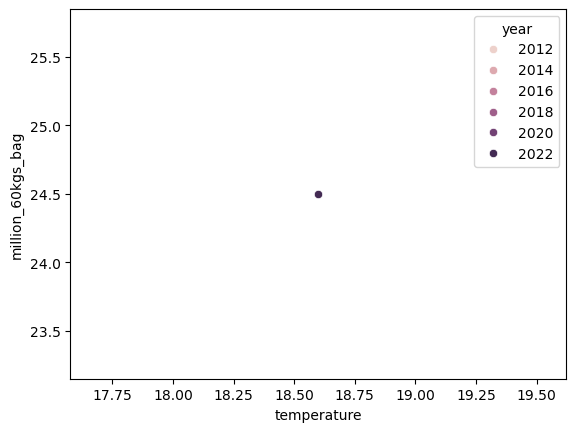

In [49]:
sns.scatterplot(data=minas_harvest, x=minas_harvest["temperature"], y=minas_harvest["million_60kgs_bag"], hue=minas_harvest["year"])

In [57]:
pd.pivot_table(minas_yearly, values="million_60kgs_bag", index="subdivison", columns="year", aggfunc="median")

KeyError: 'subdivison'